In [148]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [149]:
animals = pd.read_csv('k-animal.csv')

In [150]:
animals = animals.drop('Comments', axis=1)

In [151]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region               344 non-null    object 
 1   Stage                344 non-null    object 
 2   Individual ID        344 non-null    object 
 3   Culmen Length (mm)   342 non-null    float64
 4   Culmen Depth (mm)    342 non-null    float64
 5   Flipper Length (mm)  342 non-null    float64
 6   Body Mass (g)        342 non-null    float64
 7   Delta 15 N (o/oo)    330 non-null    float64
 8   Delta 13 C (o/oo)    331 non-null    float64
dtypes: float64(6), object(3)
memory usage: 24.3+ KB


In [152]:
animals['Culmen Length (mm)'].median()

44.45

In [153]:
animals['Culmen Depth (mm)'].median()

17.3

In [154]:
animals['Flipper Length (mm)'].median()

197.0

In [155]:
animals['Body Mass (g)'].median()

4050.0

In [156]:
animals['Delta 15 N (o/oo)'].median()

8.652405

In [157]:
animals['Delta 13 C (o/oo)'].median()

-25.83352

In [158]:
animals = animals.fillna({'Culmen Length (mm)': 44.45, 'Culmen Depth (mm)': 17.3, 'Flipper Length (mm)': 197.0, 'Body Mass (g)': 4050.0, 'Delta 15 N (o/oo)': 8.65, 'Delta 13 C (o/oo)': -25.83})

In [159]:
object = StandardScaler()
animals['Culmen Length (mm)'] = object.fit_transform(animals[['Culmen Length (mm)']])
animals['Culmen Depth (mm)'] = object.fit_transform(animals[['Culmen Depth (mm)']])
animals['Flipper Length (mm)'] = object.fit_transform(animals[['Flipper Length (mm)']])
animals['Body Mass (g)'] = object.fit_transform(animals[['Body Mass (g)']])
animals['Delta 15 N (o/oo)'] = object.fit_transform(animals[['Delta 15 N (o/oo)']])
animals['Delta 13 C (o/oo)'] = object.fit_transform(animals[['Delta 13 C (o/oo)']])
animals.head(1)


,Region,Stage,Individual ID,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Anvers,"Adult, 1 Egg Stage",N1A1,-0.887622,0.787289,-1.420541,-0.564625,-0.148165,-0.177707


In [160]:
animals = animals.drop(columns=['Region', 'Stage'])

In [161]:
animals['AnimalID'] = range(1,345)


In [162]:
animals = animals.drop(columns=['Individual ID', 'AnimalID'])

In [163]:
kmeans2 = KMeans(n_clusters = 2, random_state = 0).fit_predict(animals)

In [164]:
kmeans2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [165]:
label0 = animals[kmeans2 ==0]
label1 = animals[kmeans2 ==1]

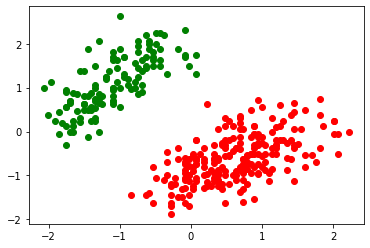

In [166]:
plt.scatter(x=label0['Culmen Depth (mm)'], y=label0['Body Mass (g)'], color='red')
plt.scatter(x=label1['Culmen Depth (mm)'], y=label1['Body Mass (g)'], color='green')

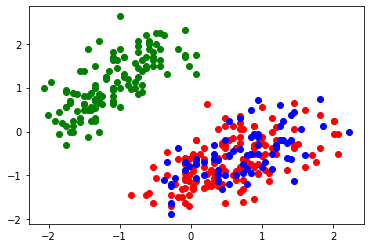

In [167]:
kmeans3 = KMeans(n_clusters = 3, random_state = 0).fit_predict(animals)
label0 = animals[kmeans3 ==0]
label1 = animals[kmeans3 ==1]
label2 = animals[kmeans3 ==2]
plt.scatter(x=label0['Culmen Depth (mm)'], y=label0['Body Mass (g)'], color='red')
plt.scatter(x=label1['Culmen Depth (mm)'], y=label1['Body Mass (g)'], color='green')
plt.scatter(x=label2['Culmen Depth (mm)'], y=label2['Body Mass (g)'], color='blue')

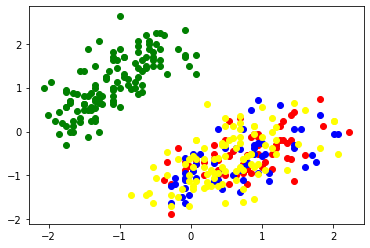

In [168]:
kmeans4 = KMeans(n_clusters = 4, random_state = 0).fit_predict(animals)
label0 = animals[kmeans4 ==0]
label1 = animals[kmeans4 ==1]
label2 = animals[kmeans4 ==2]
label3 = animals[kmeans4 ==3]
plt.scatter(x=label0['Culmen Depth (mm)'], y=label0['Body Mass (g)'], color='red')
plt.scatter(x=label1['Culmen Depth (mm)'], y=label1['Body Mass (g)'], color='green')
plt.scatter(x=label2['Culmen Depth (mm)'], y=label2['Body Mass (g)'], color='blue')
plt.scatter(x=label3['Culmen Depth (mm)'], y=label3['Body Mass (g)'], color='yellow')

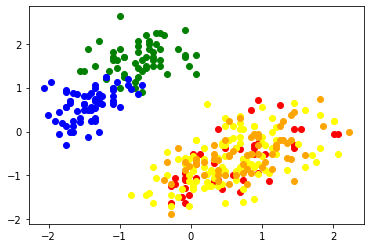

In [169]:
kmeans5 = KMeans(n_clusters = 5, random_state = 0).fit_predict(animals)
label0 = animals[kmeans5 ==0]
label1 = animals[kmeans5 ==1]
label2 = animals[kmeans5 ==2]
label3 = animals[kmeans5 ==3]
label4 = animals[kmeans5 ==4]
plt.scatter(x=label0['Culmen Depth (mm)'], y=label0['Body Mass (g)'], color='red')
plt.scatter(x=label1['Culmen Depth (mm)'], y=label1['Body Mass (g)'], color='green')
plt.scatter(x=label2['Culmen Depth (mm)'], y=label2['Body Mass (g)'], color='blue')
plt.scatter(x=label3['Culmen Depth (mm)'], y=label3['Body Mass (g)'], color='yellow')
plt.scatter(x=label4['Culmen Depth (mm)'], y=label4['Body Mass (g)'], color='orange')

In [171]:
kmeans6 = KMeans(n_clusters = 6, random_state = 0).fit(animals)
kmeans7 = KMeans(n_clusters = 7, random_state = 0).fit(animals)
kmeans8 = KMeans(n_clusters = 8, random_state = 0).fit(animals)
kmeans9 = KMeans(n_clusters = 9, random_state = 0).fit(animals)

In [172]:
distortions = []
K=range(2, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(animals)
    distortions.append(kmeanModel.inertia_)

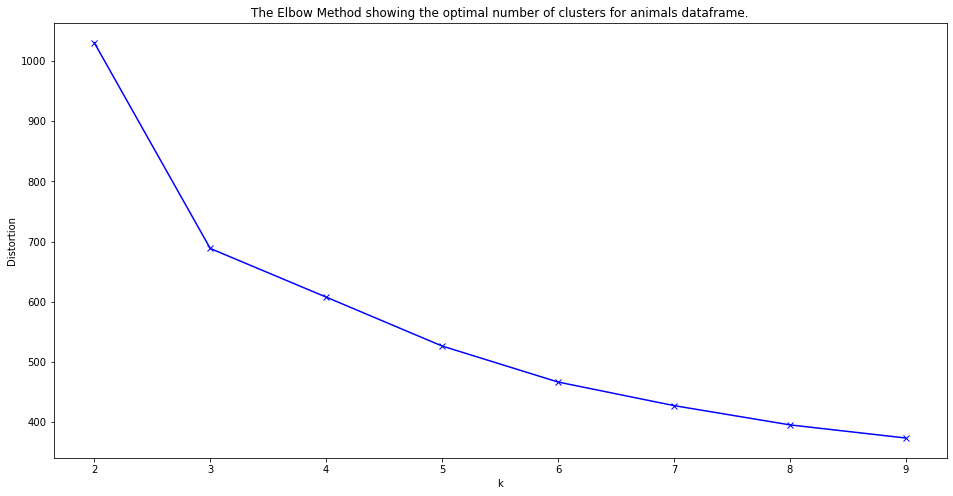

In [173]:
plt.figure(figsize = (16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal number of clusters for animals dataframe.')
plt.show()

3 clusters seems to be the reasonable choice for K in this animals dataset.